In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')

In [20]:
df_new = pd.read_pickle(r'C:\Users\nishi\Desktop\EECS 731 - Data Science\Project\df_new.pkl')

In [21]:
df_new = df_new[['RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','payment_type','trip_type','trip_duration','month','day','weekend_Trip','hour','airport']]
X = df_new[['RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','payment_type','trip_type','trip_duration','month','day','weekend_Trip','hour','airport']]
y = df_new[['fare_amount']]

In [22]:
# Create and fit selector
selector1 = SelectKBest(f_regression, k=1)
selector2 = SelectKBest(f_regression, k=2)
selector3 = SelectKBest(f_regression, k=3)
selector4 = SelectKBest(f_regression, k=4)
selector5 = SelectKBest(f_regression, k=5)
selector6 = SelectKBest(f_regression, k=6)
selector7 = SelectKBest(f_regression, k=7)
selector8 = SelectKBest(f_regression, k=8)
selector9 = SelectKBest(f_regression, k=9)
selector1.fit(X, y)
selector2.fit(X, y)
selector3.fit(X, y)
selector4.fit(X, y)
selector5.fit(X, y)
selector6.fit(X, y)
selector7.fit(X, y)
selector8.fit(X, y)
selector9.fit(X, y)
# Get idxs of columns to keep
idxs_selected1 = selector1.get_support()
idxs_selected2 = selector2.get_support()
idxs_selected3 = selector3.get_support()
idxs_selected4 = selector4.get_support()
idxs_selected5 = selector5.get_support()
idxs_selected6 = selector6.get_support()
idxs_selected7 = selector7.get_support()
idxs_selected8 = selector8.get_support()
idxs_selected9 = selector9.get_support()
# Create new dataframe with only desired columns, or overwrite existing
features_dataframe_new1 = X.columns[idxs_selected1]
features_dataframe_new2 = X.columns[idxs_selected2]
features_dataframe_new3 = X.columns[idxs_selected3]
features_dataframe_new4 = X.columns[idxs_selected4]
features_dataframe_new5 = X.columns[idxs_selected5]
features_dataframe_new6 = X.columns[idxs_selected6]
features_dataframe_new7 = X.columns[idxs_selected7]
features_dataframe_new8 = X.columns[idxs_selected8]
features_dataframe_new9 = X.columns[idxs_selected9]

In [23]:
print("Rank 1 : " + str(features_dataframe_new1.values))
print("Rank 2 : " + str(features_dataframe_new2[~features_dataframe_new2.isin(features_dataframe_new1)].values))
print("Rank 3 : " + str(features_dataframe_new3[~features_dataframe_new3.isin(features_dataframe_new2)].values))
print("Rank 4 : " + str(features_dataframe_new4[~features_dataframe_new4.isin(features_dataframe_new3)].values))
print("Rank 5 : " + str(features_dataframe_new5[~features_dataframe_new5.isin(features_dataframe_new4)].values))
print("Rank 6 : " + str(features_dataframe_new6[~features_dataframe_new6.isin(features_dataframe_new5)].values))
print("Rank 7 : " + str(features_dataframe_new7[~features_dataframe_new7.isin(features_dataframe_new6)].values))
print("Rank 8 : " + str(features_dataframe_new8[~features_dataframe_new8.isin(features_dataframe_new7)].values))
print("Rank 9 : " + str(features_dataframe_new9[~features_dataframe_new9.isin(features_dataframe_new8)].values))

Rank 1 : ['trip_distance']
Rank 2 : ['trip_duration']
Rank 3 : ['airport']
Rank 4 : ['RatecodeID']
Rank 5 : ['payment_type']
Rank 6 : ['DOLocationID']
Rank 7 : ['trip_type']
Rank 8 : ['passenger_count']
Rank 9 : ['PULocationID']


In [24]:
selector9.scores_

array([4.64043945e+04, 4.69808864e+03, 2.74656106e+04, 5.15840650e+03,
       1.28477286e+07, 3.50619736e+04, 2.35847175e+04, 6.87031919e+06,
       8.16358294e+01, 5.24355255e+02, 1.69583146e+02, 3.49066945e+03,
       2.00811056e+05])

In [26]:
selector9.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True])

In [27]:
X.dtypes

RatecodeID           int64
PULocationID         int64
DOLocationID         int64
passenger_count      int64
trip_distance      float64
payment_type         int64
trip_type          float64
trip_duration      float64
month                int64
day                  int64
weekend_Trip         int32
hour                 int64
airport              int32
dtype: object

In [28]:
X.columns

Index(['RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'payment_type', 'trip_type', 'trip_duration', 'month',
       'day', 'weekend_Trip', 'hour', 'airport'],
      dtype='object')

In [31]:
F = pd.DataFrame(columns=['Features'], data=X.columns)

In [33]:
F['Scores'] = selector9.scores_

In [43]:
F.sort_values(by=['Scores'], ascending=False)

,Features,Scores
4,trip_distance,1.284773e+07
7,trip_duration,6.870319e+06
12,airport,2.008111e+05
0,RatecodeID,4.640439e+04
5,payment_type,3.506197e+04
2,DOLocationID,2.746561e+04
6,trip_type,2.358472e+04
3,passenger_count,5.158407e+03
1,PULocationID,4.698089e+03
11,hour,3.490669e+03


In [44]:
F.dtypes

Features     object
Scores      float64
dtype: object

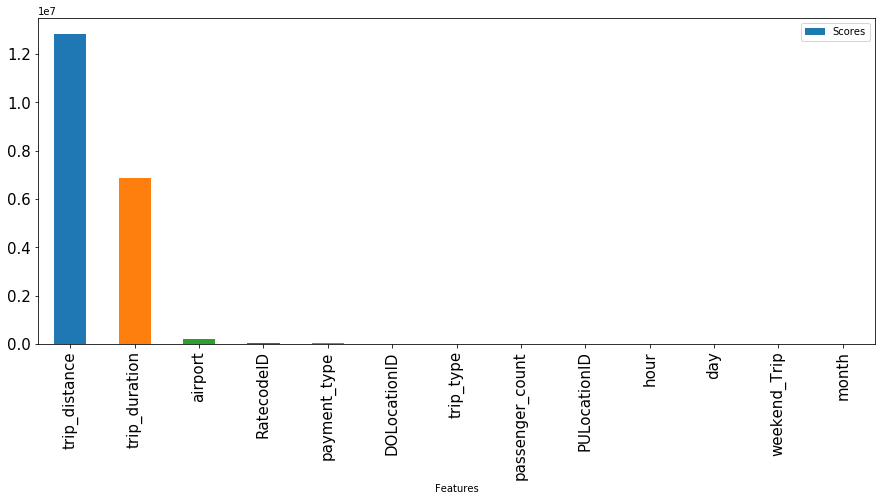

In [59]:
F.sort_values(by=['Scores'], ascending=False).plot.bar(x='Features', y='Scores',figsize=(15,6), fontsize=15)